<div class="alert alert-block alert-success"><font color="black"><h1><left>Soup to Nuts Example of Logistic Regression</left></h1></font><b><b><b><b>
I found this example here: <P>
    
    https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
        
    It does a nice job of presenting the steps, but the model evaluation measures were low.
        
            Avg Precision: 0.74     Avg Recall : 0.74     Avg F1-Score: .74  
                        
         I wanted to see if I could find the issue and improve on it


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# import seaborn as sns
import re

In [2]:
# File definitions
path = 'E:\\Education\\Data\\'
file1 = path + 'banking.csv'

In [3]:
bank_data = pd.read_csv(file1,sep=',',header=0)

In [4]:
bank_data = bank_data.dropna()
print(bank_data.shape)
print(list(bank_data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


<div class="alert alert-block alert-success"><font color="black"><h1><left>Simplify Education Attribute to 2 Fewer Categories</left></h1></font>


In [5]:
bank_data['education']=np.where(bank_data['education'] =='basic.9y', 'basic', bank_data['education'])
bank_data['education']=np.where(bank_data['education'] =='basic.6y', 'basic', bank_data['education'])
bank_data['education']=np.where(bank_data['education'] =='basic.4y', 'basic', bank_data['education'])
bank_data['education'].unique()
 


array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [ ]:
div class="alert alert-block alert-success"><font color="black"><h1><leftEDA Examination</left></h1></font>


In [ ]:
bank_data.groupby('y').mean()

In [ ]:
bank_data.groupby('job').mean()

In [ ]:
bank_data.groupby('marital').mean()

In [ ]:
bank_data.groupby('education').mean()

In [ ]:
# Some Jobs have a higher chance pf purchasing a product
pd.crosstab(bank_data.job,bank_data.y).plot(kind='bar')
plt.title('Purchase Freq By Job')
plt.xlabel('Job')
plt.ylabel('Purchase Freq')

In [ ]:
# marital Status is not a good predictor of purchasing a product
table = pd.crosstab(bank_data.marital,bank_data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Purchase Freq By Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

In [ ]:
# Education appears to be a good predictor of purchasing a product
table = pd.crosstab(bank_data.education,bank_data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Purchase Freq By Education')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

In [ ]:
# day of week is not a good predictor of purchasing a product
table = pd.crosstab(bank_data.day_of_week,bank_data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Purchase Freq By Day Of Week')
plt.xlabel('Day of Week')
plt.ylabel('Proportion of Customers')

In [ ]:
# month is a good predictor of purchasing a product
table = pd.crosstab(bank_data.month,bank_data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Purchase Freq By Month')
plt.xlabel('Month')
plt.ylabel('Proportion of Customers')

In [ ]:
# Most custoemrs are 30 - 40
bank_data.age.hist()
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')

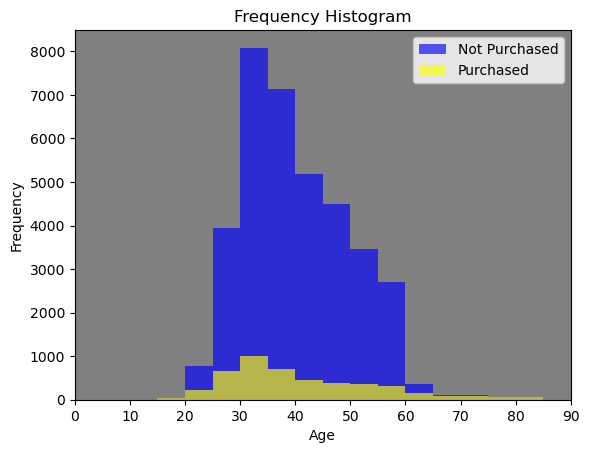

In [6]:
# Ages 25 - 40 were the buiggest purchasers
# It appeas that 25 - 30 was largest proportionof purchusers to non-purchasers

x1 = bank_data.loc[bank_data['y'] == 0, 'age']
x2 = bank_data.loc[bank_data['y'] == 1, 'age']

abins = range(5,90,5)
kwargs = dict(alpha=0.65, bins=abins)
ax = plt.axes(alpha=0)
ax.set_facecolor("grey")
plt.hist(x1, **kwargs, color='blue', label='Not Purchased')
plt.hist(x2, **kwargs, color='yellow', label='Purchased')


# atext = 'K25.0  N = ' + str(len(x1))
# btext = 'K25.4  N = ' + str(len(x2))

# ax.text(0.53, 0.95,atext, horizontalalignment='left', verticalalignment='top',transform=ax.transAxes)
# ax.text(0.53, 0.90, btext, horizontalalignment='left', verticalalignment='top',transform=ax.transAxes)

#plt.gca().set(title='Frequency Histogram of Diamond Depths', ylabel='Frequency')
#plt.hist(wanted_admissions['stay_hours'], bins=abins)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency', xlabel='Age');
plt.xlim(0,90)
plt.legend();
# plt.show()

In [ ]:
# poutcom is a good predictor of purchasing a product
table = pd.crosstab(bank_data.poutcome,bank_data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Purchase Freq Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Proportion of Customers')

<div class="alert alert-block alert-success"><font color="black"><h1><left>Identify Categorical Columns and Generate Dummy Variables</left></h1></font>


In [7]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(bank_data[var], prefix=var)
    data1=bank_data.join(cat_list)
    bank_data=data1

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=bank_data.columns.values.tolist()
data_vars

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month

In [8]:
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=bank_data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

<div class="alert alert-block alert-success"><font color="black"><h1><left>Split dataset into Train and Test. <P>Balance the Train Dataset for both Logical Outcome</left></h1></font>


In [9]:
# SMOTE oversampling
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
print(os_data_X.columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# print(columns)
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day

<div class="alert alert-block alert-success"><font color="black"><h1><left>This is the Step that Was Missing That Resulted in Poor Numbers.</left></h1></font> <P>
    Training Dataset was NOT Standardized! <P>
    Evaluation Scores After Standardization: <P>
        Avg Precision: 0.94     Avg Recall : 0.94     Avg F1-Score: .94  
 </div>

In [15]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

trans = MinMaxScaler()
data1 = trans.fit_transform(os_data_X)
data2 = trans.transform(X_test)

# convert the array back to a dataframe
os_data_X_stan = DataFrame(data1, columns = X_train.columns)
X_test_stan = DataFrame(data2, columns = X_test.columns)
# summarize
os_data_X_stan[1:20]

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
1,0.333333,0.061000,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.957379,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.320988,0.027247,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.957379,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.222222,0.034364,0.023810,1.0,0.000000,0.687500,0.389322,0.368201,0.797778,0.877883,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.197531,0.051850,0.023810,1.0,0.142857,0.333333,0.269680,0.192469,0.143278,0.512287,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0.407407,0.043717,0.047619,1.0,0.000000,1.000000,0.669135,0.338912,0.980957,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0.320988,0.036194,0.023810,1.0,0.000000,1.000000,0.882307,0.376569,0.959193,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.234568,0.146808,0.047619,1.0,0.142857,0.687500,0.389322,0.368201,0.797778,0.877883,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,0.419753,0.019520,0.000000,1.0,0.000000,1.000000,0.669135,0.338912,0.981183,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.222222,0.035787,0.023810,1.0,0.000000,0.937500,0.698753,0.602510,0.957379,0.859735,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10,0.172840,0.018707,0.023810,1.0,0.000000,0.937500,0.698753,0.602510,0.957153,0.859735,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
X_test_stan[1:20]

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
1,0.172840,0.112037,0.047619,1.000000,0.142857,0.333333,0.340608,0.154812,0.188619,0.512287,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.197531,0.023587,0.023810,1.000000,0.000000,1.000000,0.669135,0.338912,0.981183,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.148148,0.020333,0.000000,1.000000,0.000000,1.000000,0.882307,0.376569,0.980957,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.493827,0.043920,0.000000,1.000000,0.000000,0.687500,0.389322,0.368201,0.767853,0.877883,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.098765,0.063237,0.047619,1.000000,0.000000,0.937500,0.698753,0.602510,0.958059,0.859735,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,0.308642,0.082554,0.095238,1.000000,0.000000,0.333333,0.269680,0.192469,0.146679,0.512287,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.148148,0.016877,0.023810,1.000000,0.000000,0.937500,0.698753,0.602510,0.957606,0.859735,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.246914,0.017080,0.000000,1.000000,0.142857,0.000000,0.174591,0.866109,0.018136,0.203781,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.222222,0.053477,0.119048,1.000000,0.000000,1.000000,0.882307,0.376569,0.958966,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10,0.197531,0.010777,0.000000,1.000000,0.000000,0.937500,0.698753,0.602510,0.957379,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


<div class="alert alert-block alert-success"><font color="black"><h1><left>With Standardization, the RFE pProcess Recommended A Significantly Different Set of Covariates</left></h1></font> <P>
New Set of Covariates:
    
    ['duration', 'nr_employed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_yes', 'loan_unknown',
       'contact_cellular', 'contact_telephone', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed']
</div>

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
# os_data_X.dtypes
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg,n_features_to_select=20)
rfe = rfe.fit(os_data_X_stan, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False False False False False  True False False
 False False False False False False False False False False  True  True
  True False  True  True False  True  True  True False False False  True
 False  True False  True False  True  True False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[42  1 20 37 38 24 26 39 27  1 13  6  9 10 12 17  7  8 16 11 14 15  1  1
  1  2  1  1 23  1  1  1 19 18 40  1  3  1  5  1  4  1  1 32 35 29 34 33
 41 25 28 31 30  1  1  1  1  1 21 22 36]


In [41]:
os_data_X_stan.columns[[1,9,22,23,24,26,27,29,30,31,35,37,39,41,42,53,54, 55, 56, 57]]
#type(os_data_X_stan.columns)

Index(['duration', 'nr_employed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_yes', 'loan_unknown',
       'contact_cellular', 'contact_telephone', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed'],
      dtype='object')

<div class="alert alert-block alert-success"><font color="black"><h1><left>All Covariates, Except Marital_Married Had P-scores < .0005</left></h1></font> <P>

Column marital_married was removed and model was rerun </div>


In [42]:
import statsmodels.api as sm
cols = ['duration', 'nr_employed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_yes', 'loan_unknown',
       'contact_cellular', 'contact_telephone', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed']
X=os_data_X_stan[cols]
y=os_data_y['y']
        
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.241580
         Iterations 8
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.651     
Dependent Variable:      y                    AIC:                  24745.9252
Date:                    2023-04-11 22:47     BIC:                  24922.7693
No. Observations:        51134                Log-Likelihood:       -12353.   
Df Model:                19                   LL-Null:              -35443.   
Df Residuals:            51114                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          8.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [43]:
cols = ['duration', 'nr_employed', 'marital_divorced', 'marital_single', 
        'education_basic', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_yes', 'loan_unknown',
       'contact_cellular', 'contact_telephone', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed']
X=os_data_X_stan[cols]
y=os_data_y['y']
        
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.241598
         Iterations 8
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.651     
Dependent Variable:      y                    AIC:                  24745.7694
Date:                    2023-04-11 22:50     BIC:                  24913.7713
No. Observations:        51134                Log-Likelihood:       -12354.   
Df Model:                18                   LL-Null:              -35443.   
Df Residuals:            51115                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          8.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

<div class="alert alert-block alert-success"><font color="black"><h1><left>Predictions Were Generated</left></h1></font> <P>

Accuracy, Confusion matrix, Classification Report, and ROC shows singificantly better performance </div>


In [47]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7475  191]
 [ 721 6954]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7666
           1       0.97      0.91      0.94      7675

    accuracy                           0.94     15341
   macro avg       0.94      0.94      0.94     15341
weighted avg       0.94      0.94      0.94     15341



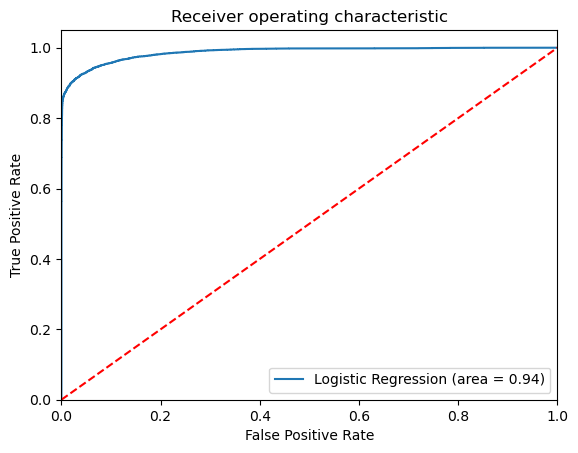

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()